# Assignment #4: Python Plot

dataset: https://data.ontario.ca/dataset/ontario-top-baby-names-female

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load and read dataset

df = pd.read_csv('Ontario Top Baby Names (Females).csv')
df

,_id,Year/Année,Name/Nom,Frequency/Fréquence
0,1,1913,MARGARET,6
1,2,1913,MARY,7
2,3,1914,GLADYS,6
3,4,1914,MARGARET,9
4,5,1914,MARY,9
...,...,...,...,...
91174,91175,2022,ZOYA,75
91175,91176,2022,ZUNAIRA,7
91176,91177,2022,ZURI,29
91177,91178,2022,ZYA,7


In [3]:
df.describe()

,_id,Year/Année,Frequency/Fréquence
count,91179.000000,91179.000000,91179.000000
mean,45590.000000,1982.933943,57.250145
std,26321.254434,28.677459,154.949883
min,1.000000,1913.000000,6.000000
25%,22795.500000,1962.000000,8.000000
50%,45590.000000,1989.000000,15.000000
75%,68384.500000,2008.000000,39.000000
max,91179.000000,2022.000000,3545.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91179 entries, 0 to 91178
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   _id                  91179 non-null  int64 
 1   Year/Année           91179 non-null  int64 
 2   Name/Nom             91179 non-null  object
 3   Frequency/Fréquence  91179 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 2.8+ MB


In [5]:
df.isnull().sum()
# no missing data

_id                    0
Year/Année             0
Name/Nom               0
Frequency/Fréquence    0
dtype: int64

In [6]:
df.nunique()

_id                    91179
Year/Année               110
Name/Nom                6534
Frequency/Fréquence     1328
dtype: int64

In [7]:
df = df.drop_duplicates().drop(columns="_id")
df
# no duplicates found, dropping _id column

,Year/Année,Name/Nom,Frequency/Fréquence
0,1913,MARGARET,6
1,1913,MARY,7
2,1914,GLADYS,6
3,1914,MARGARET,9
4,1914,MARY,9
...,...,...,...
91174,2022,ZOYA,75
91175,2022,ZUNAIRA,7
91176,2022,ZURI,29
91177,2022,ZYA,7


In [ ]:
# renaming columns to avoid accent on 'e'
df = df.rename(columns = {
    'Year/Année': 'Year/Annee',
    'Frequency/Fréquence': 'Frequency/Frequence'})
df

,Year/Annee,Name/Nom,Frequency/Frequence
0,1913,MARGARET,6
1,1913,MARY,7
2,1914,GLADYS,6
3,1914,MARGARET,9
4,1914,MARY,9
...,...,...,...
91174,2022,ZOYA,75
91175,2022,ZUNAIRA,7
91176,2022,ZURI,29
91177,2022,ZYA,7


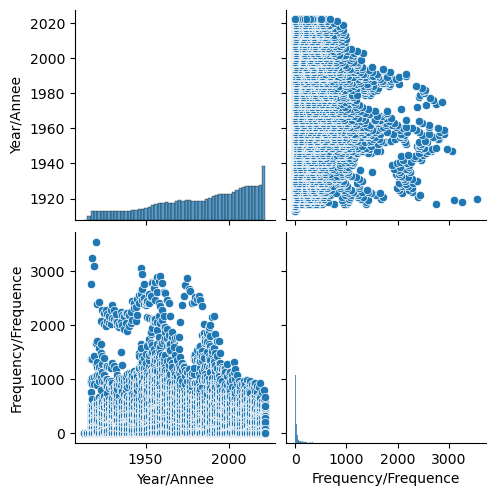

In [9]:
# quick plotting of all variables
sns.pairplot(df)
plt.show()

In [10]:
# sorting data by year and frequency
df_1 = df.sort_values(by = ['Year/Annee', 'Frequency/Frequence'], ascending = [True, True])

#df_name.first()
df_1



,Year/Annee,Name/Nom,Frequency/Frequence
0,1913,MARGARET,6
1,1913,MARY,7
2,1914,GLADYS,6
3,1914,MARGARET,9
4,1914,MARY,9
...,...,...,...
91031,2022,SOPHIA,507
90127,2022,EMMA,528
89739,2022,AMELIA,537
89980,2022,CHARLOTTE,569


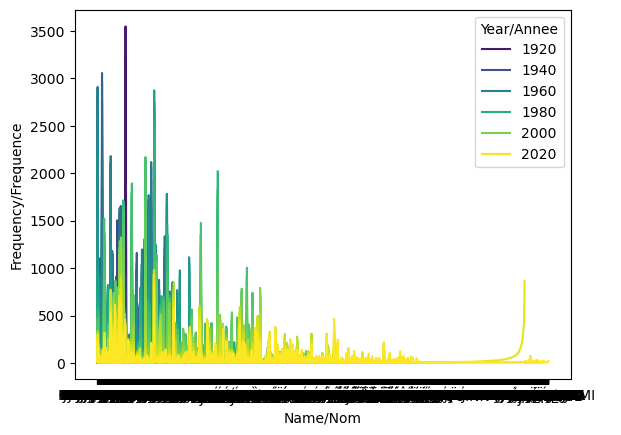

In [11]:
# plotting frequency of names through the decades for a quick overview
sns.lineplot(
    data = df_1, 
    x = 'Name/Nom', 
    y = 'Frequency/Frequence', 
    hue = 'Year/Annee',
    palette = 'viridis')

plt.show()

In [12]:
# resetting the index
df = df.reset_index()
print(df.index)
df

RangeIndex(start=0, stop=91179, step=1)


,index,Year/Annee,Name/Nom,Frequency/Frequence
0,0,1913,MARGARET,6
1,1,1913,MARY,7
2,2,1914,GLADYS,6
3,3,1914,MARGARET,9
4,4,1914,MARY,9
...,...,...,...,...
91174,91174,2022,ZOYA,75
91175,91175,2022,ZUNAIRA,7
91176,91176,2022,ZURI,29
91177,91177,2022,ZYA,7


In [13]:
# grouping data by year and name and sorting by descending frequency
df_2 = df.groupby(['Year/Annee', 'Name/Nom']).sum().sort_values(by = ['Year/Annee','Frequency/Frequence'], ascending = [True, False])
df_2

index  Frequency/Frequence
Year/Annee Name/Nom                            
1913       MARY          1                    7
           MARGARET      0                    6
1914       MARGARET      3                    9
           MARY          4                    9
           GLADYS        2                    6
...                    ...                  ...
2022       ZARIYA    91152                    6
           ZAYLA     91154                    6
           ZHURI     91161                    6
           ZION      91165                    6
           ZYVA      91178                    6

[91179 rows x 2 columns]

In [14]:
# determining the top name per year
top_names = df.sort_values(by=['Year/Annee', 'Frequency/Frequence'], ascending=[True, False])
top_names = top_names.drop_duplicates(subset='Year/Annee', keep='first')

top_names

,index,Year/Annee,Name/Nom,Frequency/Frequence
1,1,1913,MARY,7
3,3,1914,MARGARET,9
6,6,1915,MARGARET,13
14,14,1916,MARGARET,14
276,276,1917,M,2755
...,...,...,...,...
84436,84436,2018,OLIVIA,863
86011,86011,2019,OLIVIA,934
87603,87603,2020,OLIVIA,762
89217,89217,2021,OLIVIA,811


In [15]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


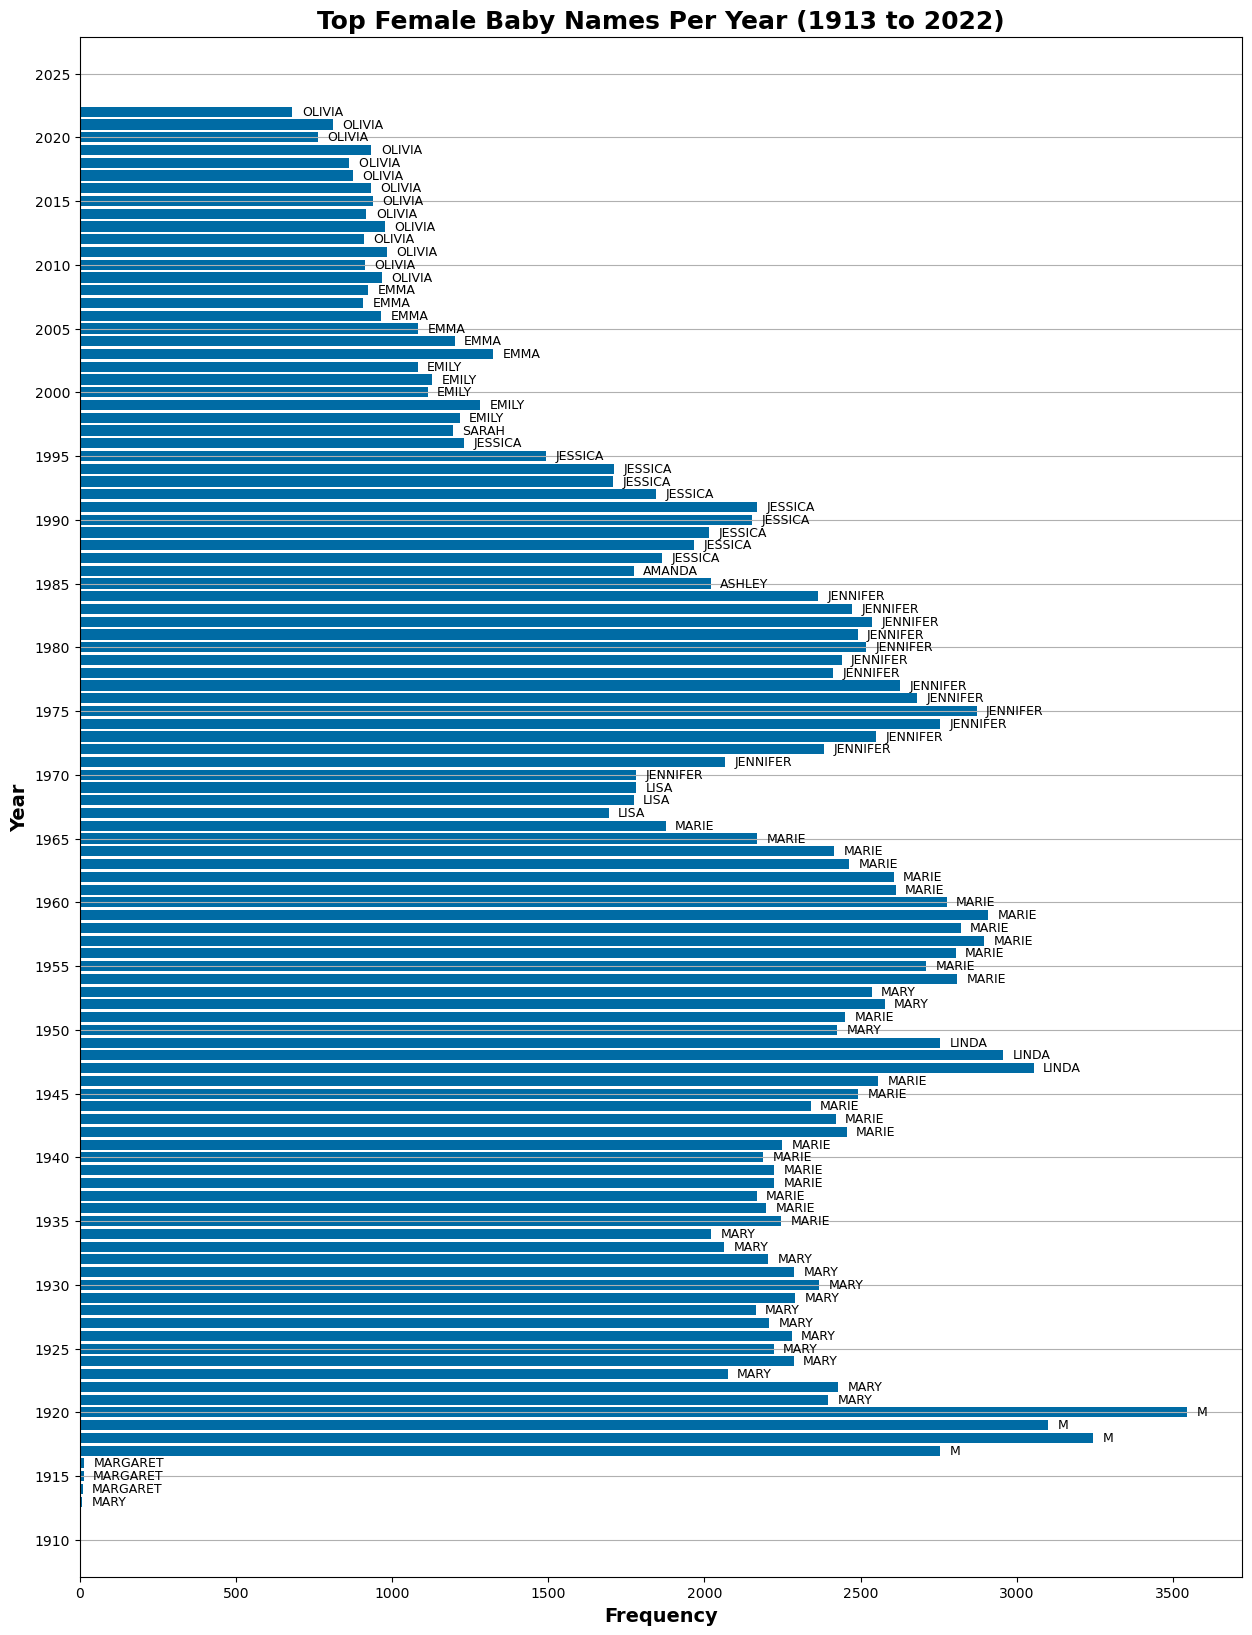

In [16]:
# plotting top name per year in a horizontal bar graph
plt.style.use('tableau-colorblind10')
fig, ax = plt.subplots(figsize=(15, 20))
plt.barh(top_names['Year/Annee'], top_names['Frequency/Frequence'])
ax.yaxis.set_major_locator(plt.MultipleLocator(5))
ax.grid(axis = 'y')

# adding the top name to each bar
for index, row in top_names.iterrows():
    plt.text(
        x=row['Frequency/Frequence'] + 30,  
        y=row['Year/Annee'], 
        s=row['Name/Nom'], 
        va='center', fontsize=9
    )

# adding titles and labels
plt.title('Top Female Baby Names Per Year (1913 to 2022)', fontweight = 'bold', fontsize=18)
plt.xlabel('Frequency', fontweight = 'bold', fontsize=14)
plt.ylabel('Year', fontweight = 'bold', fontsize=14)
plt.show()


In [17]:
# grouping data by year and name and sorting by descending frequency
df_2 = df.groupby(['Year/Annee', 'Name/Nom']).sum().sort_values(by = ['Year/Annee','Frequency/Frequence'], ascending = [True, False])
df_2

index  Frequency/Frequence
Year/Annee Name/Nom                            
1913       MARY          1                    7
           MARGARET      0                    6
1914       MARGARET      3                    9
           MARY          4                    9
           GLADYS        2                    6
...                    ...                  ...
2022       ZARIYA    91152                    6
           ZAYLA     91154                    6
           ZHURI     91161                    6
           ZION      91165                    6
           ZYVA      91178                    6

[91179 rows x 2 columns]

In [18]:
# determining the top 3 names per year
top_3 = df.sort_values(by=['Year/Annee', 'Frequency/Frequence'], ascending=[True, False])
top_3 = top_3.groupby(['Year/Annee']).head(3)
top_3


,index,Year/Annee,Name/Nom,Frequency/Frequence
1,1,1913,MARY,7
0,0,1913,MARGARET,6
3,3,1914,MARGARET,9
4,4,1914,MARY,9
2,2,1914,GLADYS,6
...,...,...,...,...
88497,88497,2021,EMMA,626
88351,88351,2021,CHARLOTTE,615
90807,90807,2022,OLIVIA,681
89980,89980,2022,CHARLOTTE,569


In [19]:
# determining the top 10 names per decade
df['Decade'] = (df['Year/Annee'] // 10) * 10 # adding a 'decade' column and assigning each year to a decade
top_10 = df.sort_values(by=['Decade', 'Frequency/Frequence'], ascending=[True, False])
top_10 = top_10.groupby(['Decade']).head(10)
top_10

,index,Year/Annee,Name/Nom,Frequency/Frequence,Decade
694,694,1918,M,3245,1910
1100,1100,1919,M,3100,1910
276,276,1917,M,2755,1910
1113,1113,1919,MARGARET,1428,1910
287,287,1917,MARGARET,1385,1910
...,...,...,...,...,...
88101,88101,2021,AMELIA,613,2020
86767,86767,2020,CHARLOTTE,596,2020
86915,86915,2020,EMMA,596,2020
88220,88220,2021,AVA,578,2020


In [20]:
# determining the top 20 names of all time
top_20 = df.sort_values(by = 'Frequency/Frequence', ascending = False)
top_20 = top_20.drop_duplicates(subset='Name/Nom', keep='first')
top_20.head(20)

,index,Year/Annee,Name/Nom,Frequency/Frequence,Decade
1519,1519,1920,M,3545,1920
12852,12852,1947,LINDA,3054,1940
20385,20385,1959,MARIE,2908,1950
33404,33404,1975,JENNIFER,2872,1970
16786,16786,1954,MARY,2776,1950
19804,19804,1958,SUSAN,2179,1950
48010,48010,1991,JESSICA,2169,1990
17133,17133,1955,DEBORAH,2115,1950
41783,41783,1985,ASHLEY,2021,1980
44510,44510,1988,AMANDA,1892,1980


In [29]:
# exporting sorted data for Tableau visualization
top_3.to_csv('top_3_names_per_year.csv', index=False)
top_10.to_csv('top_10_names_per_decade.csv', index=False)
top_20.to_csv('top_20_names_all_time.csv', index=False)